<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [11]:
sac_csv = './sacramento_real_estate_transactions.csv'
sac = pd.read_csv(sac_csv)


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [13]:
# A:
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [21]:

print(len(sac))

985


In [25]:
sac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [26]:
sac.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [33]:
def stats(column, data):
    X = data[column]
    print ('COLUMN: ' + column)
    print ('mean: ' + str(np.mean(X)))
    print ('median: ' + str(np.median(X)))
    #print ('mode: ' + str(stats.mode([round(d) for d in X])))#
    print ('variance: ' + str(np.var(X)))
    print ('standard deviation: ' + str(np.std(X)))

In [34]:
#tried creating a function but there were errors with mode piece so i took that out 
stats('price', sac)

COLUMN: price
mean: 233715.95126903552
median: 213750.0
variance: 19326059237.9164
standard deviation: 139018.1975063567


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

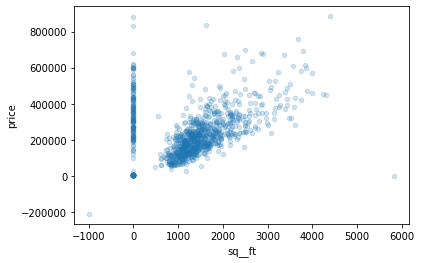

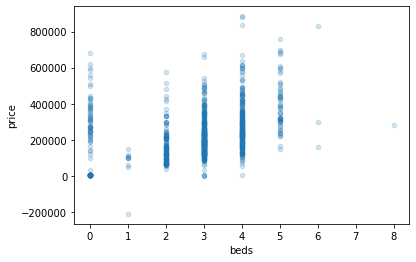

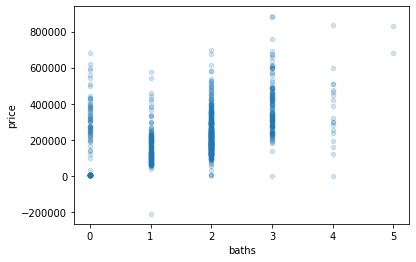

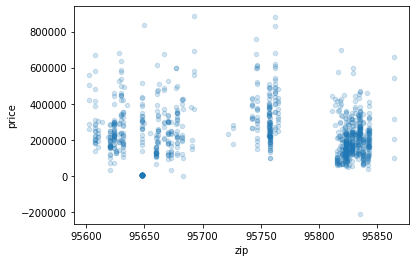

In [44]:
# A
sac.plot(kind='scatter', x='sq__ft', y='price', alpha=0.2);
sac.plot(kind='scatter', x='beds', y='price', alpha=0.2);
sac.plot(kind='scatter', x='baths', y='price', alpha=0.2);
sac.plot(kind='scatter', x='zip', y='price', alpha=0.2);

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A: Sq__ft because it looks like as it increases, price increases so there is a correlation 

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [45]:
# A:
feature_cols = ['sq__ft']
X = sac[feature_cols]
y = sac.price
print(X)
print(y)

     sq__ft
0       836
1      1167
2       796
3       852
4       797
..      ...
980    2280
981    1477
982    1216
983    1685
984    1362

[985 rows x 1 columns]
0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64


In [46]:
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [47]:
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [48]:
print((X.shape))
print((y.shape))

(985, 1)
(985,)


In [57]:
import statsmodels.api as sm
def return_slope_intercept(X,Y):
    endog = sac['price']
    exog = sm.add_constant(sac['sq__ft'])
    model = sm.OLS(endog,exog)
    results = model.fit()
    return results.params[1],results.params[0]

In [58]:
import statsmodels.api as sm

return_slope_intercept(sac['sq__ft'],sac['price'])

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(55.177212405007445, 161272.75277922268)

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:Something isn't working with my function and predictor...

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:a buyer or seller could use the model to predict how much money their house will sell for by plugging in sq ft 
# for inference, we could infer that larger houses are worth more money and of higher value 

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: